# implementing creation events
Tim Tyree<br>
7.6.2023

In [1]:
from lib.my_initialization import *
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

# define module

In [2]:
# @njit
def format_particles(frameno,t,x_values,y_values,pid_values,round_t_to_n_decimals=5):
    n_tips = x_values.shape[0]
    dict_out = {
        'frame':frameno,
        't': np.around(t,round_t_to_n_decimals),
        'n': n_tips,
        'x': x_values,
        'y': y_values,
        'particle':pid_values,
    }
    return dict_out

from numba import jit,njit
@njit
def normalRandom():
    return np.random.normal()

@njit
def uniformRandom():
    return np.random.uniform(0,1)
# normalRandom(),uniformRandom()

# @njit
# def levyRandom2D(alpha):
#     th = 2*np.pi*np.random.uniform(0,1)
#     ul = np.random.uniform(0,1)**(-1./alpha)
#     dWx = ul*np.cos(th)
#     dWy = ul*np.sin(th)
#     return np.array([dWx,dWy])
# dWx,dWy = stepscale*levyRandom2D(alpha)
# dWx,dWy 

In [3]:
def gener_random_creation_position(x_new,y_new,still_running,R_c_bar,L):
    """
    Example Usage:
xg,yg=gener_random_creation_position(x_new,y_new,still_running,R_c_bar,L)
x_new[igone[0]] = xg
y_new[igone[0]] = yg
    """
    #determine random angle
    theta=2*np.pi*np.random.uniform(0,1)
    #select random particle
    ihere = np.random.choice(np.argwhere(still_running).flatten())
    #place new particle distance R_c_bar from random particle
    xg=x_new[ihere] + R_c_bar*np.cos(theta)
    yg=y_new[ihere] + R_c_bar*np.sin(theta)
    #check if new particle is within distance R_c_bar from any other particles
    mindist=2.*L
    for j in np.argwhere(still_running).flatten():
        if j != ihere:
            dist=dist_pbc(xg,yg,x_new[j],y_new[j],L);
            if dist<mindist:
                mindist=dist
    #while new particle is within distance R_c_bar from any other particle
    while mindist<R_c_bar:
        #determine random angle
        theta=2*np.pi*np.random.uniform(0,1)
        #select random particle
        ihere = np.random.choice(np.argwhere(still_running).flatten())
        #place new particle distance R_c_bar from random particle
        xg=x_new[ihere] + R_c_bar*np.cos(theta)
        yg=y_new[ihere] + R_c_bar*np.sin(theta)
        #check if new particle is within distance R_c_bar from any other particles
        mindist=2.*L
        for j in np.argwhere(still_running).flatten():
            if j != ihere:
                dist=dist_pbc(xg,yg,x_new[j],y_new[j],L);
                if dist<mindist:
                    mindist=dist
    return xg,yg

# recall apparent birth and death rates

In [4]:
#DONE: recall creation information
R_c_bar=0.7029 #+/-0.0049 cm FK
R_c_bar=0.6667 #+/-0.0083 cm LR

In [5]:
#recall death rates
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


In [6]:
#recall birth rates
birth_rate_dir_fk = f'{nb_dir}/data/full_results/data_fig4_timothy_fk_up2_rescaled_per_tt.csv'
birth_rate_dir_lr = f'{nb_dir}/data/full_results/data_fig4_timothy_lr_up2_rescaled_per_tt.csv'
df_birth_fk = pd.read_csv(birth_rate_dir_fk)
df_birth_lr = pd.read_csv(birth_rate_dir_lr)
#scale from kHz to Hz
df_birth_fk['w']*=1e3
df_birth_lr['w']*=1e3
# DONE: compute powerlaw fits of birth rates wjr
print(f"creation rate density powerlaw fits:")
dict_fit_birth_fk = print_fit_power_law(x=df_birth_fk['q'].values,y=df_birth_fk['w'].values)
dict_fit_birth_lr = print_fit_power_law(x=df_birth_lr['q'].values,y=df_birth_lr['w'].values)

creation rate density powerlaw fits:
m = 0.229594 +/- 0.010098
M = 0.864210 +/- 0.002349 Hz/cm^2; B=0.529597 +/- 0.020570
RMSE=0.0215 Hz/cm^2; R^2=0.9655; MPE=3.0209%; N=73
m = 0.714755 +/- 0.009768
M = 3.277073 +/- 0.102643 Hz/cm^2; B=5.262676 +/- 0.107278
RMSE=0.0417 Hz/cm^2; R^2=0.9971; MPE=4.2323%; N=62


In [7]:
Mp=dict_fit_birth_fk['M']
nup=dict_fit_birth_fk['m']

# Mp=dict_fit_birth_lr['M']
# nup=dict_fit_birth_lr['m']

# generate video of the LPM with creation

In [8]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
# seed=0
# seed=1
seed=2
# seed=3
# seed=4
# seed=5
# seed=6
# seed=42

#random number stream A
rs = RandomState(MT19937(SeedSequence(seed)))
#random number stream B
# rs = RandomState(MT19937(SeedSequence(987654321)))
np.random.seed(seed)

In [9]:
#FK
# Mp = 0.8642103569057054 # +/- 0.002349 Hz/cm^2
# nup = 0.22959399086621063 #+/- 0.010098
Mp  = 0.864 #+/- 0.002 Hz/cm^2
nup = 0.230 #+/- 0.010

In [13]:
#LR
# Mp = 3.2770725040489235 #+/- 0.102643 Hz/cm^2;
# nup = 0.7147550082416185 #+/- 0.009768
Mp = 3.28 #+/- 0.10 Hz/cm^2;
nup = 0.715 #+/- 0.010

# Mp=0 #COMMENT_HERE

In [14]:
#DONE: copy annihilation algorithm here

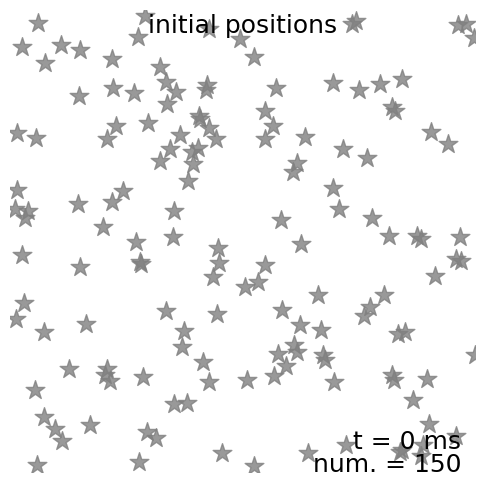

In [15]:
show_movie=True
# show_movie=False

N=150 #max number of particles
# N=2 
Ninitial=2 #COMMENT_HERE
# Nfinal=6 #~1m run time starting from Ninitial=N
Nfinal=0 #~3m play time starting from Ninitial=N
# Nfinal=2
L=5
# L=10
np.random.seed(42)
x_values=rs.uniform(size=N)*L
y_values=rs.uniform(size=N)*L
t=0
use_uniform_ic=True
use_uniform_ic=False
if use_uniform_ic:
    Nrow=4
#     Nrow=10
    #explicitely uniform ic.
    uvals=np.linspace(0,L*Nrow/(Nrow+1),Nrow)
    x_values,y_values=np.meshgrid(uvals,uvals)
    x_values=x_values.flatten()+L/(2*(Nrow+1))
    y_values=y_values.flatten()+L/(2*(Nrow+1))
    #explicitely enter ^these values in my c simulation and run it
    N = x_values.shape[0]
    
#return a scatter plot that may be saved as png
if show_movie:
    annotating=True
    message='initial positions'
    fig=ScatterPlotSnapshot(x_values,y_values,t,width=L,height=L,
                            annotating=annotating,message=message,inch=6)
    plt.show()

In [16]:
if show_movie:
    #for snapshot output
    save_folder=f"{nb_dir}/Figures/mov"
    if os.path.exists(save_folder):
        #cleanse the old snapshot folder
        shutil.rmtree(save_folder)
    os.mkdir(save_folder)
    frameno=1
    save_fn=None
    inch=6
    annotating=True

# message='without forces'
# force_code=0
# varkappa=0
# message='with anti-spring forces'
# force_code=1
# varkappa=-5
message='with particle creation'
force_code=2
# varkappa=1.552

In [17]:
#define model parameters
# #FK
# r=0.7 #cm 
# varkappa=1.552 #cm^2/s
# D=0.115 #cm^2/s
# # save_every=25
# save_every=5
# # save_every=1 #45 min

#LR
r=0.314 #cm 
varkappa=9.3 #cm^2/s
D=0.42 #cm^2/s
save_every=5 
# save_every=1
# save_every=1000000000
# varkappa=0 #no attraction

kappa=75 #Hz
kappa=1e5 #Hz  #COMMENT HERE
# varkappa=93 #cm^2/s #COMMENT HERE
Dt=1e-5;dt=1e-5
# tmax=500
tmax=1 #s

#for forces
x0=5
# no_repulsion=1
# no_attraction=1
no_repulsion=0
no_attraction=0
seed=123456789
#skipping reflect,set_second, and neighbor functionality

#define constants
alpha=1. #ballistic
alpha=2. #diffusive
# alpha=1.5 #levy-esque  #gives wrong annihilation rates

running simulation...


KeyboardInterrupt: 

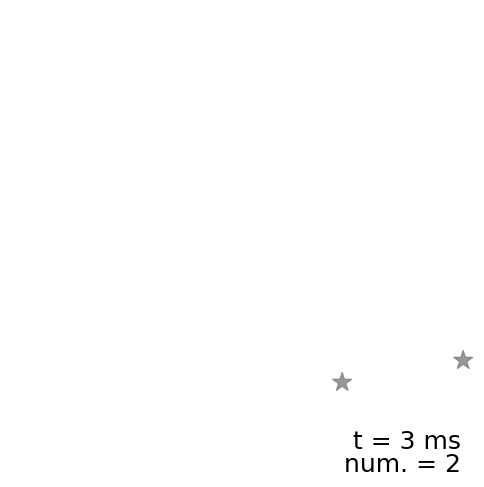

In [18]:
# message=f'with {alpha=}'
message=' '
stepscale=np.sqrt(2*D*Dt) #diffusive
# stepscale=(2*D*Dt)**(1/alpha)
probreact=kappa*dt
T_net=0;count_net=0
np.random.seed(seed)
dist_cutoff=1e-2
# iter_per_movestep = round(Dt/dt)
impulse_prefactor= varkappa * Dt
tiarray=np.zeros(N)
tfarray=np.zeros(N)
epsilon=5e-2  #reactions happen immediately at this range
creation_duration = 0.0025 # 0.001 #s  # 0.1 #s
# chi=20. # unitless value >1.  = repulsion_strength / attraction_strength
chi=2.08 #±0.04 # LR # unitless value >1.  = repulsion_strength / attraction_strength
# chi=2.94 #±0.04 # FK # unitless value >1.  = repulsion_strength / attraction_strength
use_pair_create=True
# use_pair_create=False
use_set_created_from_existing=True
# epsilon=5e-4  #reactions happen?
#heretim
#for csv output
data_folder=f"{nb_dir}/data/local_results/creation_test"
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
data_folder=data_folder+"/Log"
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
data_fn=f"pbc_seed_{seed}_fc_{force_code}_r_{r}_D_{D}_L_{L}_kappa_{kappa}_varkappa_{varkappa}_alpha_{alpha}_creatdur_{creation_duration}_chi_{chi}_log.csv"

step=0
recording_locations=True
recording_snapshots=True
# recording_locations=False
# recording_snapshots=False
print("running simulation...");
t=-Dt
# still_running=True;
exit_code=-1;T=-9999.
#initialize positions
# #uniform random ic
# x_values=rs.uniform(size=N)*L
# y_values=rs.uniform(size=N)*L
# #explicitely uniform ic
# uvals=np.linspace(0,L,5)
# x_values,y_values=np.meshgrid(uvals,uvals)
# x_values=x_values.flatten()
# y_values=y_values.flatten()

#lower case: world coordinates
#upper case: material coordinates
x=x_values.copy()
y=y_values.copy()
x_old=x_values.copy()
y_old=y_values.copy()
x_new=x_values.copy()
y_new=y_values.copy()
X=x_values.copy()
Y=y_values.copy()
X_old=x_values.copy()
Y_old=y_values.copy()
X_new=x_values.copy()
Y_new=y_values.copy()
zeros=np.zeros_like(x_values)
zerosint=np.zeros_like(x_values).astype('int')
# still_running=zerosint==zerosint
still_running=zerosint!=zerosint
still_running[:Ninitial]=True  #initialize first Ninitial particles to still be running
caught=zerosint.copy()-9999#!=zerosint
anticaught=zerosint.copy()-9999#!=zerosint
# //start set_second kernel
# //end set_second kernel
#make still_running into still_running_values
dict_out_lst=[]
# reset the net forces
Fx_net=zeros.copy()
Fy_net=zeros.copy()
# while(still_running.any()):
while(still_running.sum()>Nfinal):
    # //reinitialize_kernel, which copies X,Y_new to X,Y_old
    min_dist_old=zeros+9999999
    i_neighbor=zerosint-1
    x_old=x_new
    y_old=y_new
    t=t+Dt;

    #sum_each_force_kernel
    for i in range(N):
        if(still_running[i]):
            for j in range(i+1,N):
                if(still_running[j]):
                    #compute displacement vector with pbc
                    dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                    dy = subtract_pbc_1d(y_old[j],y_old[i],L);
                    dist2=dx*dx+dy*dy;
                    if (dist2<1e-8):
                        dist2=float(1e-8)
                    dist = np.sqrt(dist2)
                    #compute displacement due to drift
                    impulse_factor=0.
                    if (force_code==1):
                      #spring
                      impulse_factor=impulse_prefactor*(dist-x0)/dist;
                    if (force_code==2):
                      #QED2: force ~ inverse power law
                      impulse_factor=impulse_prefactor/dist2;
                    if (force_code==3):
                      #QED3: force ~ inverse square power law
                      impulse_factor=impulse_prefactor/dist2/dist;
                    #set impulse_factor to zero if it is explicitly forbidden by the user input
                    if ((no_attraction==1) & (impulse_factor>0)):
                        impulse_factor=0.
                    if ((no_repulsion==1) & (impulse_factor<0)):
                        impulse_factor=0.
                    #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                    Fx_net[i]=Fx_net[i]+dx*impulse_factor;
                    Fy_net[i]=Fy_net[i]+dy*impulse_factor;
                    Fx_net[j]=Fx_net[j]-dx*impulse_factor;
                    Fy_net[j]=Fy_net[j]-dy*impulse_factor                    
                    #determine if they are closer than epsilon
                    if dist<epsilon:
                        #remove if they are
                        still_running[i]=False
                        still_running[j]=False
                        #heretim
                        uncatch_set=set()
                        if caught[i]>=0: 
                            uncatch_set.update([caught[i]])
                            if caught[caught[i]]>=0:
                                uncatch_set.update([caught[caught[i]]])
                        if caught[j]>=0: 
                            uncatch_set.update([caught[j]])
                            if caught[caught[j]]>=0:
                                uncatch_set.update([caught[caught[j]]])
                        if len(uncatch_set)>0:
                            for k in uncatch_set:
                                caught[k]=-9999
    #compute the one_step given the net force, F_net
    for i in range(N):
        if(still_running[i]):
            if caught[i]<0:
                dxt=Fx_net[i];
                dyt=Fy_net[i];
                # compute displacement due to levy flight
#                 dxW,dyW = stepscale*levyRandom2D(alpha)
                dxW = stepscale*normalRandom()
                dyW = stepscale*normalRandom()
                # next spatial position, time integrating by a duration, Dt. enforce PBC.
                x_new[i]=periodic(x_old[i]+dxW+dxt,L);
                y_new[i]=periodic(y_old[i]+dyW+dyt,L);
            else:
                j=caught[i]
                ti=tiarray[i]
                tf=tfarray[i]            
                #compute displacement vector with pbc
                dx = subtract_pbc_1d(x_old[j],x_old[i],L)
                dy = subtract_pbc_1d(y_old[j],y_old[i],L)      
                xl = dx - (x_old[j]-x_old[i])
                yl = dy - (y_old[j]-y_old[i])
                #compute average location
                xavg = x_old[i] + 0.5*dx 
                yavg = y_old[i] + 0.5*dy
                #compute frac to interpolate by
                frac = (t-ti)/(tf-ti)
                frac = np.min((1,frac))
                x_new[i] = periodic(x_old[i]*(1-frac) + (xavg+xl)*frac,L)
                y_new[i] = periodic(y_old[i]*(1-frac) + (yavg+yl)*frac,L)
    #reaction_kernel
    for i in range(N):
        if(still_running[i]&(caught[i]<0)):
            # // each i,j pair is reached once per call to kernel_measure
            for j in range(i+1,N):
                if(still_running[j]&(caught[j]<0)):
                    # // compute distance between particles that are still running
                    dist=dist_pbc(x_new[i],y_new[i],x_new[j],y_new[j],L);
                    in_range=dist<r;
                    # // in_range=true;//uncomment for smeared method
                    # // if two particles are in range
                    if(in_range):
                        # // determine whether those two particles react via the simple method
                        reacts=probreact>uniformRandom();
                        # // determine whether those two particles react via the smeared method
                        # // sig=sigmoid(dist, r, beta);
                        # // reacts=probreact*sig>uniformRandom();
                        if(reacts):
                            exit_code=1;
                            T=t;
#                             still_running[i]=False;
#                             still_running[j]=False;
                            #uncatch any previous catches
                            if caught[i]>=0: caught[caught[i]]=-9999
                            if caught[j]>=0: caught[caught[j]]=-9999
                            #catch these two
                            caught[i]=j;
                            caught[j]=i;
                            #determine deltat
                            deltat = dist**2/(4*(varkappa+2*D))
                            #determine ti,tf
                            tiarray[i]=t
                            tfarray[i]=t+deltat
                            tiarray[j]=t
                            tfarray[j]=t+deltat

    
    #determine rate_of_creation from average density
    num_particles = np.sum(still_running)
    A = L**2
    prob_create = dt * Mp * (num_particles / A) ** nup * A
    #creation_kernel
    if prob_create>np.random.uniform():
        if np.sum(~still_running)>=2:
            #select the first two particles that are removed
            igone=np.argwhere(~still_running)
            
            #set their positions to 2 uniformly distributed positions
            x_new[igone[0]]=np.random.uniform()*L
            x_new[igone[1]]=np.random.uniform()*L
            y_new[igone[0]]=np.random.uniform()*L
            y_new[igone[1]]=np.random.uniform()*L

            #optionally set their positions to average a random location
            if use_pair_create:
                #optionally set their positions be a fixed distance to nearest tip
                if use_set_created_from_existing:
                    #place a pair of particles uniformly on the circle of radius R_c_bar from a random particle
                    xg,yg=gener_random_creation_position(x_new,y_new,still_running,R_c_bar,L)
                    x_new[igone[0]] = xg
                    y_new[igone[0]] = yg
                theta=2*np.pi*np.random.uniform(0,1)
                x_new[igone[1]]=x_new[igone[0]] + 2.*r*np.cos(theta)
                y_new[igone[1]]=y_new[igone[0]] + 2.*r*np.sin(theta)

            still_running[igone[0]]=True
            still_running[igone[1]]=True
            caught[igone[0]]=-9999
            caught[igone[1]]=-9999
            anticaught[igone[0]]=igone[1]
            anticaught[igone[1]]=igone[0]
            tfarray[igone[0]]=t+creation_duration
            tfarray[igone[1]]=t+creation_duration
                
    # reset the net forces
    Fx_net=zeros.copy()
    Fy_net=zeros.copy()
    #creation_force_kernel
    if use_pair_create:
        for i in range(N):
            if(still_running[i]&(anticaught[i]>=0)):
                j = anticaught[i]
                if still_running[j]:
                    #compute displacement vector with pbc
                    dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                    dy = subtract_pbc_1d(y_old[j],y_old[i],L);
                    dist2=dx*dx+dy*dy;
                    if (dist2<1e-8):
                        dist2=float(1e-8)
                    dist = np.sqrt(dist2)
                    #compute displacement due to drift
                    impulse_factor=0.
                    if (force_code==1):
                      #spring
                      impulse_factor=impulse_prefactor*(dist-x0)/dist;
                    if (force_code==2):
                      #QED2: force ~ inverse power law
                      impulse_factor=impulse_prefactor/dist2;
                    if (force_code==3):
                      #QED3: force ~ inverse square power law
                      impulse_factor=impulse_prefactor/dist2/dist;
                    #set impulse_factor to zero if it is explicitly forbidden by the user input
                    if ((no_attraction==1) & (impulse_factor<0)):
                        impulse_factor=0.
                    if ((no_repulsion==1) & (impulse_factor>0)):
                        impulse_factor=0.
                    #account for double counting and then scale
                    impulse_factor*=0.5*chi
                    #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                    Fx_net[i]=Fx_net[i]-dx*impulse_factor;
                    Fy_net[i]=Fy_net[i]-dy*impulse_factor;
                    Fx_net[j]=Fx_net[j]+dx*impulse_factor;
                    Fy_net[j]=Fy_net[j]+dy*impulse_factor 
    
    #turn off creation array
    for i in range(N):
        if still_running[i] and anticaught[i]>=0:
            if t>tfarray[i]:
                anticaught[i]=-9999
                    
    if show_movie:
        if step%save_every==0:
            x_plot=x_new[still_running]
            y_plot=y_new[still_running]
            c_plot = np.array(['gray']*y_plot.shape[0])
            caugh=caught[still_running]
            for i in range(y_plot.shape[0]):
                if caugh[i]>=0:
                    c_plot[i]='r'
            acaugh=anticaught[still_running]
            for i in range(y_plot.shape[0]):
                if acaugh[i]>=0:
                    c_plot[i]='g'

            if recording_snapshots:
                #save result as png
                SaveScatterPlotSnapshot(x_plot,y_plot,t,
                                        c=c_plot,
                                        width=L,height=L,
                                frameno=frameno,save_folder=save_folder,
                                annotating=annotating,message=message)
    #             print(f"- saved pic at {frameno=}")
            if (recording_locations)&(x_plot.shape[0]>0):
                pid_values = np.arange(x_values.shape[0])[still_running]
                #append particle locations to log, dict_out_lst
                dict_out=format_particles(frameno,t,x_plot,y_plot,pid_values=pid_values)
                dict_out_lst.append(dict_out)

            frameno+=1

    #shut simulation down if it's taking too long...
    if (t>tmax):
        for i in range(N):
            still_running[i]=False;
            exit_code=-99;
    
    step+=1
    #end while running
    
#record this trial
if (exit_code>0):
    if (T>0.):
        T_net=T_net+T;
        count_net=count_net+1;
    
print(f"simulation complete!")
beep(1)

In [19]:
T+dt

-9998.99999

In [20]:
#DONE: print termination time
print(f"termination time: {t:.4f} s")
# termination time: 0.0668 s

termination time: 0.0029 s


In [278]:
#save particle locations as csv
saving=recording_locations
# saving=False
printing=True
df = pd.concat([pd.DataFrame(dict_out) for dict_out in dict_out_lst])
df.reset_index(inplace=True, drop=True)
if saving:
    #save the recorded data
    os.chdir(data_folder)
    df.to_csv(data_fn, index=False)
    if printing:
        print('saved to:')
        print(os.path.abspath(data_fn))
    #     #if the end of AF was indeed reachded, append a row recording this
    #     if n_tips==0:
    #         next_id = df.index.values[-1]+1
    #         df = pd.concat([df,pd.DataFrame({'t': float(save_every_n_frames*h+t),'n': int(n_tips)}, index = [next_id])])
    #save the recorded data
#     #     df.round(round_output_decimals).to_csv(data_dir_log, index=False)
#     if printing:
#         print('saved to:')
#         print(data_dir_log)

saved to:
/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/creation_test/Log/pbc_seed_123456789_fc_2_r_0.314_D_0.42_L_5_kappa_100000.0_varkappa_9.3_alpha_2.0_creatdur_0.0025_chi_2.08_log.csv


In [204]:
# /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/creation_test/Log/pbc_seed_123456789_fc_2_r_0.314_D_0.42_L_5_kappa_100000.0_varkappa_9.3_alpha_2.0_creatdur_0.0025_chi_2.08_log.csv
print(os.path.abspath(data_fn))

NameError: name 'data_fn' is not defined

In [203]:
!./concat_folder_png.sh

ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory
./concat_folder_png.sh: 33: source: not found
ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory
ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory
ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory
ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory
ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory


In [24]:
#concatenate the folder of .png files
os.chdir(f'{nb_dir}/../vid/src')
os.system(f'./concat_folder_png.sh');

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.1.2_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --

frame=   90 fps=0.0 q=0.0 Lsize=     516kB time=00:00:01.50 bitrate=2810.6kbits/s speed=8.99x    
video:417kB audio:71kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 5.840719%
ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.1.2_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreety

frame=2880093 fps=447 q=-1.0 Lsize=  335693kB time=13:20:01.50 bitrate=  57.3kbits/s dup=1 drop=0 speed=7.44x    
video:301970kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 11.167765%
[libx264 @ 0x7facd7f1c100] frame I:11522 Avg QP:17.35  size:  3124
[libx264 @ 0x7facd7f1c100] frame P:728218 Avg QP:28.82  size:   183
[libx264 @ 0x7facd7f1c100] frame B:2140353 Avg QP:22.77  size:    66
[libx264 @ 0x7facd7f1c100] consecutive B-frames:  0.8%  0.2%  0.2% 98.8%
[libx264 @ 0x7facd7f1c100] mb I  I16..4: 64.4% 32.7%  2.9%
[libx264 @ 0x7facd7f1c100] mb P  I16..4:  0.0%  0.2%  0.0%  P16..4:  2.5%  0.1%  0.0%  0.0%  0.0%    skip:97.1%
[libx264 @ 0x7facd7f1c100] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  0.9%  0.0%  0.0%  direct: 0.0%  skip:99.0%  L0:51.2% L1:48.8% BI: 0.0%
[libx264 @ 0x7facd7f1c100] 8x8 transform intra:37.4% inter:73.1%
[libx264 @ 0x7facd7f1c100] coded y,uvDC,uvAC intra: 1.8% 0.9% 0.8% inter: 0.0% 0.0% 0.0%
[libx264 @ 0x7facd7f1c100] i16 v,h,dc,p: 

In [25]:
os.system(f'open {nb_dir}/../vid/mov/out.mov')

0

In [262]:
10000/241
0.1/40

0.0025

In [263]:
#Q: why aren't I seeing them pull together slowly?
print(f'annihilation duration: {deltat/dt=:.0f} steps')
print(f'annihilation duration: {deltat/dt/save_every=:.0f} frames')
print(f'creation duration: {creation_duration/dt=:.0f} steps')

annihilation duration: deltat/dt=238 steps
annihilation duration: deltat/dt/save_every=48 frames
creation duration: creation_duration/dt=250 steps


In [264]:
#TODO: determine rate_of_creation from average density
#TODO: set prob_create = dt*rate_of_creation/num_particles to a constant for each particle
#TODO: if prob_create>prob():
#TODO: place a pair of particles uniformly on the circle of radius Rcbar from the particle
#TODO: repel those particles with a 1/R force that disappears exponentially fast

In [265]:
beep(3)

-n 
-n 
-n 


0

# DONE: implement creation with initial particle placed no closer than a certain distance from existing tips

In [266]:
# zerosint=np.zeros_like(x_values).astype('int')
# # still_running=zerosint==zerosint
# still_running=zerosint!=zerosint
# still_running[:Ninitial]=True  #initialize first Ninitial particles to still be running

# compute termination time

In [8]:
#DONE(elsewhere, in care): estimate chi
#DONE(in care): determine if spiral tips tend to be created between two tip positions
#Q: spiral tips tend to be created between two tip positions?
#A: no, though there does appear to be some locality that can be captured by a geometric active contour models
# HINT: start by viewing Movie S1

In [9]:
#DONE: wrap this into a function that generates a termination time
#DONE: abstract ^this to map a random seed to a termination time
#DONE: use multiprocessing to get a distribution of termination times generated
#DONE: print the mean of this distribution. record.
#DONE: repeat for FK model
#TODO: measure MTT conditioned on Ninitial=2 directly from tip positions via bootstrap
#TODO: type all this up using as few of words as possible. 

In [8]:
def seed_new_particle(x_new,y_new,still_running,L,R_c_bar,max_num_retries=100):
    """
    Example Usage:
xg,yg=seed_new_particle(x_new,y_new,still_running,L,R_c_bar,max_num_retries=100)
    """
    xg=np.random.uniform(0,1)*L
    yg=np.random.uniform(0,1)*L
    mindist=2.*L
    for j in np.argwhere(still_running).flatten():
        dist=dist_pbc(xg,yg,x_new[j],y_new[j],L);
        if dist<mindist:
            mindist=dist
    #while new particle is within distance R_c_bar from any other particle
    num=0
    while (mindist<R_c_bar) and (num<max_num_retries):
        num+=1
        xg=np.random.uniform(0,1)*L
        yg=np.random.uniform(0,1)*L
        mindist=2.*L
        for j in np.argwhere(still_running).flatten():
            dist=dist_pbc(xg,yg,x_new[j],y_new[j],L);
            if dist<mindist:
                mindist=dist
    return xg,yg

In [9]:
# xg,yg=seed_new_particle(x_new,y_new,still_running,L,R_c_bar,max_num_retries=100)
# xg,yg

In [10]:
seed=42
Ninitial=2
Nfinal=0
seed,Ninitial,Nfinal,R_c_bar,Mp,nup,chi,kappa,r,varkappa,D,r0,L,creation_duration,dt = (42, 2, 0, 1.142, 0.0, 0.715, 2.08, 75, 0.314, 9.3, 0.42, 0.202, 5, 0.1, 1e-05)
print(*(42, 2, 0, 1.142, 0.0, 0.715, 2.08, 75, 0.314, 9.3, 0.42, 0.202, 5, 0.1, 1e-05))

42 2 0 1.142 0.0 0.715 2.08 75 0.314 9.3 0.42 0.202 5 0.1 1e-05


In [11]:
def  gener_termination_time(seed,Ninitial=2,Nfinal=0,
                            chi=2.08,
                            R_c_bar=0.6667, #cm
                            kappa=75, #Hz
                            r=0.314, #cm 
                            varkappa=9.3, #cm^2/s
                            D=0.42, #cm^2/s
                            Mp = 3.28, #+/- 0.10 Hz/cm^2;
                            nup = 0.715, #+/- 0.010
                            r0=0.202,
                            L=5,
                            creation_duration = 0.1, #s 0.0025, # 0.001 #s  # 
                            Dt=1e-5,dt=1e-5,
                            no_repulsion=0,no_attraction=0,
                            save_every=5,
                            tmax=60, #s
                            epsilon=5e-2,  #reactions happen immediately at this range
                            x0=5,  #skipping reflect,set_second, and neighbor functionality
                            N=150, #max number of particles
                            force_code=2,
                            dist_cutoff=1e-2,
                            use_creation=True,
                            use_pair_create=True,
                            use_set_created_from_existing=True,
                            use_uniform_ic=False,
                            show_movie=False,#True,
                            recording_locations=False,#True,
                            recording_snapshots=False,#True,
                            printing=False,
                          **kwargs):
    """
    Example Usage:
t = gener_termination_time(seed,Ninitial=2,Nfinal=0,
                            chi=chi,kappa=kappa, #Hz
                            r=r, #cm 
                            varkappa=varkappa, #cm^2/s
                            D=D, #cm^2/s
                            Mp = Mp, # Hz/cm^2;
                            nup = nup,L=L,creation_duration = creation_duration, # 0.001 #s  # 0.1 #s
                            Dt=Dt,dt=dt,use_creation=True,use_pair_create=True,use_set_created_from_existing=True)
print(f"termination time: {t}")
    """
#     r0=r
#     r0=6e-2
#     tmax=500 #s
#     tmax=60 #s
#     epsilon=5e-2  #reactions happen immediately at this range
#     x0=5
#     #skipping reflect,set_second, and neighbor functionality
#     N=150 #max number of particles
    np.random.seed(seed)            
    x_values=np.random.uniform(0,1,size=N)*L
    y_values=np.random.uniform(0,1,size=N)*L
    t=0
    if use_uniform_ic:
        Nrow=4
    #     Nrow=10
        #explicitely uniform ic.
        uvals=np.linspace(0,L*Nrow/(Nrow+1),Nrow)
        x_values,y_values=np.meshgrid(uvals,uvals)
        x_values=x_values.flatten()+L/(2*(Nrow+1))
        y_values=y_values.flatten()+L/(2*(Nrow+1))
        #explicitely enter ^these values in my c simulation and run it
        N = x_values.shape[0]
        
    #return a scatter plot that may be saved as png
    if show_movie:
        annotating=True
        message='initial positions'
        fig=ScatterPlotSnapshot(x_values,y_values,t,width=L,height=L,
                                annotating=annotating,message=message,inch=6)
        plt.show()

    if show_movie:
        #for snapshot output
        save_folder=f"{nb_dir}/Figures/mov"
        if os.path.exists(save_folder):
            #cleanse the old snapshot folder
            shutil.rmtree(save_folder)
        os.mkdir(save_folder)
        frameno=1
        save_fn=None
        inch=6
        annotating=True

#     # message='without forces'
#     # force_code=0
#     # varkappa=0
#     # message='with anti-spring forces'
#     # force_code=1
#     # varkappa=-5
# #     message='with particle creation'
#     force_code=2    
#     dist_cutoff=1e-2
    
    # varkappa=1.552
    # message=f'with {alpha=}'
    message=' '
    stepscale=np.sqrt(2*D*Dt) #diffusive
    # stepscale=(2*D*Dt)**(1/alpha)
    probreact=kappa*dt
    A = L**2
    T_net=0;count_net=0    
    # iter_per_movestep = round(Dt/dt)
    impulse_prefactor= varkappa * Dt
    tiarray=np.zeros(N)
    tfarray=np.zeros(N)
    step=0
    if printing:
        print("running simulation...");
    t=-Dt
    # still_running=True;
    exit_code=-1;T=-9999.
    #initialize positions
    # #uniform random ic
    # x_values=rs.uniform(size=N)*L
    # y_values=rs.uniform(size=N)*L
    # #explicitely uniform ic
    # uvals=np.linspace(0,L,5)
    # x_values,y_values=np.meshgrid(uvals,uvals)
    # x_values=x_values.flatten()
    # y_values=y_values.flatten()

    #lower case: world coordinates
    #upper case: material coordinates
#     x=x_values.copy()
#     y=y_values.copy()
    x_old=x_values.copy()
    y_old=y_values.copy()
    x_new=x_values.copy()
    y_new=y_values.copy()
#     X=x_values.copy()
#     Y=y_values.copy()
#     X_old=x_values.copy()
#     Y_old=y_values.copy()
#     X_new=x_values.copy()
#     Y_new=y_values.copy()
    
    
    
    
    zeros=np.zeros_like(x_values)
    zerosint=np.zeros_like(x_values).astype('int')
    # still_running=zerosint==zerosint
    still_running=zerosint!=zerosint
#     still_running[:Ninitial]=True  #initialize first Ninitial particles to still be running
    caught=zerosint.copy()-9999#!=zerosint
    anticaught=zerosint.copy()-9999#!=zerosint
    
    #create the initial particles
    for i in range(Ninitial):
        xg,yg=seed_new_particle(x_new,y_new,still_running,L,R_c_bar,max_num_retries=100)
        x_new[i]=xg
        y_new[i]=yg
        still_running[i]=True    
    
    # //start set_second kernel
    # //end set_second kernel
    #make still_running into still_running_values
    dict_out_lst=[]
    # reset the net forces
    Fx_net=zeros.copy()
    Fy_net=zeros.copy()
    # while(still_running.any()):
    while(still_running.sum()>Nfinal):
        # //reinitialize_kernel, which copies X,Y_new to X,Y_old
        min_dist_old=zeros+9999999
        i_neighbor=zerosint-1
        x_old=x_new
        y_old=y_new
        t=t+Dt;
#         np.random.seed(seed) # didn't make it deterministic

        #sum_each_force_kernel
        for i in range(N):
            if(still_running[i]):
                for j in range(i+1,N):
                    if(still_running[j]):
                        #compute displacement vector with pbc
                        dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                        dy = subtract_pbc_1d(y_old[j],y_old[i],L);
                        dist2=dx*dx+dy*dy;
                        if (dist2<1e-8):
                            dist2=float(1e-8)
                        dist = np.sqrt(dist2)
                        #compute displacement due to drift
                        impulse_factor=0.
                        if (force_code==1):
                          #spring
                          impulse_factor=impulse_prefactor*(dist-x0)/dist;
                        if (force_code==2):
                          #QED2: force ~ inverse power law
                          impulse_factor=impulse_prefactor/dist2;
                        if (force_code==3):
                          #QED3: force ~ inverse square power law
                          impulse_factor=impulse_prefactor/dist2/dist;
                        #set impulse_factor to zero if it is explicitly forbidden by the user input
                        if ((no_attraction==1) & (impulse_factor>0)):
                            impulse_factor=0.
                        if ((no_repulsion==1) & (impulse_factor<0)):
                            impulse_factor=0.
                        #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                        Fx_net[i]=Fx_net[i]+dx*impulse_factor;
                        Fy_net[i]=Fy_net[i]+dy*impulse_factor;
                        Fx_net[j]=Fx_net[j]-dx*impulse_factor;
                        Fy_net[j]=Fy_net[j]-dy*impulse_factor                    
                        #determine if they are closer than epsilon
                        if dist<epsilon:
                            #remove if they are
                            still_running[i]=False
                            still_running[j]=False
                            uncatch_set=set()
                            if caught[i]>=0: 
                                uncatch_set.update([caught[i]])
                                if caught[caught[i]]>=0:
                                    uncatch_set.update([caught[caught[i]]])
                            if caught[j]>=0: 
                                uncatch_set.update([caught[j]])
                                if caught[caught[j]]>=0:
                                    uncatch_set.update([caught[caught[j]]])
                            if len(uncatch_set)>0:
                                for k in uncatch_set:
                                    caught[k]=-9999
        #compute the one_step given the net force, F_net
        for i in range(N):
            if(still_running[i]):
                if caught[i]<0:
                    dxt=Fx_net[i];
                    dyt=Fy_net[i];
                    # compute displacement due to levy flight
    #                 dxW,dyW = stepscale*levyRandom2D(alpha)
#                     dxW = stepscale*normalRandom()
#                     dyW = stepscale*normalRandom()
                    dxW = stepscale*np.random.normal()
                    dyW = stepscale*np.random.normal()
                    # next spatial position, time integrating by a duration, Dt. enforce PBC.
                    x_new[i]=periodic(x_old[i]+dxW+dxt,L);
                    y_new[i]=periodic(y_old[i]+dyW+dyt,L);
                else:
                    j=caught[i]
                    ti=tiarray[i]
                    tf=tfarray[i]            
                    #compute displacement vector with pbc
                    dx = subtract_pbc_1d(x_old[j],x_old[i],L)
                    dy = subtract_pbc_1d(y_old[j],y_old[i],L)      
                    xl = dx - (x_old[j]-x_old[i])
                    yl = dy - (y_old[j]-y_old[i])
                    #compute average location
                    xavg = x_old[i] + 0.5*dx 
                    yavg = y_old[i] + 0.5*dy
                    #compute frac to interpolate by
                    frac = (t-ti)/(tf-ti)
                    frac = np.min((1,frac))
                    x_new[i] = periodic(x_old[i]*(1-frac) + (xavg+xl)*frac,L)
                    y_new[i] = periodic(y_old[i]*(1-frac) + (yavg+yl)*frac,L)
        #reaction_kernel
        for i in range(N):
            if(still_running[i]&(caught[i]<0)&(anticaught[i]<0)):
                # // each i,j pair is reached once per call to kernel_measure
                for j in range(i+1,N):
                    if(still_running[j]&(caught[j]<0)&(anticaught[j]<0)):
                        # // compute distance between particles that are still running
                        dist=dist_pbc(x_new[i],y_new[i],x_new[j],y_new[j],L);
                        in_range=dist<r;
                        # // in_range=true;//uncomment for smeared method
                        # // if two particles are in range
                        if(in_range):
                            # // determine whether those two particles react via the simple method
#                             reacts=probreact>uniformRandom();
                            reacts=probreact>np.random.uniform(0,1);
                            # // determine whether those two particles react via the smeared method
                            # // sig=sigmoid(dist, r, beta);
                            # // reacts=probreact*sig>uniformRandom();
                            if(reacts):
                                exit_code=1;
                                T=t;
    #                             still_running[i]=False;
    #                             still_running[j]=False;
                                #uncatch any previous catches
                                if caught[i]>=0: caught[caught[i]]=-9999
                                if caught[j]>=0: caught[caught[j]]=-9999
                                #catch these two
                                caught[i]=j;
                                caught[j]=i;
                                #determine deltat
                                deltat = dist**2/(4*(varkappa+2*D))
                                #determine ti,tf
                                tiarray[i]=t
                                tfarray[i]=t+deltat
                                tiarray[j]=t
                                tfarray[j]=t+deltat

        #determine rate_of_creation from average density
        num_particles = np.sum(still_running)
        prob_create = dt * Mp * (num_particles / A) ** nup * A
        #creation_kernel
        if not use_creation:
            prob_create=0 
        if prob_create>np.random.uniform(0,1):
            if np.sum(~still_running)>=2:
                #select the first two particles that are removed
                igone=np.argwhere(~still_running)
                #reset/set their internal state
                caught[igone[0]]=-9999
                caught[igone[1]]=-9999
                anticaught[igone[0]]=igone[1]
                anticaught[igone[1]]=igone[0]
                tfarray[igone[0]]=t+creation_duration
                tfarray[igone[1]]=t+creation_duration
                
#                 #set their positions to 2 uniformly distributed positions
#                 x_new[igone[0]]=np.random.uniform(0,1)*L
#                 x_new[igone[1]]=np.random.uniform(0,1)*L
#                 y_new[igone[0]]=np.random.uniform(0,1)*L
#                 y_new[igone[1]]=np.random.uniform(0,1)*L
                
                #check if new particle is within distance R_c_bar from any other particles
                for ihere in igone[:2]:
                    xg,yg=seed_new_particle(x_new,y_new,still_running,L,R_c_bar,max_num_retries=1000)
                    x_new[ihere]=xg
                    y_new[ihere]=yg
                    still_running[ihere]=True
            
                #optionally set their positions to average a random location
                if use_pair_create:
                    #optionally set their positions be a fixed distance to nearest tip
                    if use_set_created_from_existing:
                        #place a pair of particles uniformly on the circle of radius R_c_bar from a random particle
                        xg,yg=gener_random_creation_position(x_new,y_new,still_running,R_c_bar,L)
                        x_new[igone[0]] = xg
                        y_new[igone[0]] = yg
                    theta=2*np.pi*np.random.uniform(0,1)
                    #heretim
                    x_new[igone[1]]=x_new[igone[0]] + 2.*r0*np.cos(theta)
                    y_new[igone[1]]=y_new[igone[0]] + 2.*r0*np.sin(theta)


        # reset the net forces
        Fx_net=zeros.copy()
        Fy_net=zeros.copy()
        #creation_force_kernel
        if use_pair_create:
            for i in range(N):
                if(still_running[i]&(anticaught[i]>=0)):
                    j = anticaught[i]
                    if still_running[j]:
                        #compute displacement vector with pbc
                        dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                        dy = subtract_pbc_1d(y_old[j],y_old[i],L);
                        dist2=dx*dx+dy*dy;
                        if (dist2<1e-8):
                            dist2=float(1e-8)
                        dist = np.sqrt(dist2)
                        #compute displacement due to drift
                        impulse_factor=0.
                        if (force_code==1):
                          #spring
                          impulse_factor=impulse_prefactor*(dist-x0)/dist;
                        if (force_code==2):
                          #QED2: force ~ inverse power law
                          impulse_factor=impulse_prefactor/dist2;
                        if (force_code==3):
                          #QED3: force ~ inverse square power law
                          impulse_factor=impulse_prefactor/dist2/dist;
                        #set impulse_factor to zero if it is explicitly forbidden by the user input
                        if ((no_attraction==1) & (impulse_factor<0)):
                            impulse_factor=0.
                        if ((no_repulsion==1) & (impulse_factor>0)):
                            impulse_factor=0.
                        #account for double counting and then scale
                        impulse_factor*=0.5*chi
                        #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                        Fx_net[i]=Fx_net[i]-dx*impulse_factor;
                        Fy_net[i]=Fy_net[i]-dy*impulse_factor;
                        Fx_net[j]=Fx_net[j]+dx*impulse_factor;
                        Fy_net[j]=Fy_net[j]+dy*impulse_factor 

        #turn off creation array
        for i in range(N):
            if still_running[i] and anticaught[i]>=0:
                if t>tfarray[i]:
                    anticaught[i]=-9999

        if show_movie:
            if step%save_every==0:
                x_plot=x_new[still_running]
                y_plot=y_new[still_running]
                c_plot = np.array(['gray']*y_plot.shape[0])
                caugh=caught[still_running]
                for i in range(y_plot.shape[0]):
                    if caugh[i]>=0:
                        c_plot[i]='r'
                acaugh=anticaught[still_running]
                for i in range(y_plot.shape[0]):
                    if acaugh[i]>=0:
                        c_plot[i]='g'

                if recording_snapshots:
                    #save result as png
                    SaveScatterPlotSnapshot(x_plot,y_plot,t,
                                            c=c_plot,
                                            width=L,height=L,
                                    frameno=frameno,save_folder=save_folder,
                                    annotating=annotating,message=message)
        #             print(f"- saved pic at {frameno=}")
                if (recording_locations)&(x_plot.shape[0]>0):
                    pid_values = np.arange(x_values.shape[0])[still_running]
                    #append particle locations to log, dict_out_lst
                    dict_out=format_particles(frameno,t,x_plot,y_plot,pid_values=pid_values)
                    dict_out_lst.append(dict_out)

                frameno+=1

        #shut simulation down if it's taking too long...
        if (t>tmax):
            for i in range(N):
                still_running[i]=False;
                exit_code=-99;

        step+=1
        #end while running

    #record this trial
    if (exit_code>0):
        if (T>0.):
            T_net=T_net+T;
            count_net=count_net+1;

    if printing:
        print(f"simulation complete!")
        beep(1)

    if recording_locations:
        #for csv output
        data_folder=f"{nb_dir}/data/local_results/creation_test_paired"
        if not os.path.exists(data_folder):
            os.mkdir(data_folder)
        data_folder=data_folder+"/Log"
        if not os.path.exists(data_folder):
            os.mkdir(data_folder)
#         data_fn=f"pbc_seed_{seed}_fc_{force_code}_r_{r}_D_{D}_L_{L}_kappa_{kappa}_varkappa_{varkappa}_alpha_{alpha}_creatdur_{creation_duration}_chi_{chi}_log.csv"
        data_fn=f"pbc_seed_{seed}_fc_{force_code}_r_{r}_D_{D}_L_{L}_kappa_{kappa}_varkappa_{varkappa}_creatdur_{creation_duration}_chi_{chi}_log.csv"
        
    #save particle locations as csv
    if recording_locations:
        df = pd.concat([pd.DataFrame(dict_out) for dict_out in dict_out_lst])
        df.reset_index(inplace=True, drop=True)
        #save the recorded data
        os.chdir(data_folder)
        df.to_csv(data_fn, index=False)
        if printing:
            print('saved to:')
            print(os.path.abspath(data_fn))
        
    return t

In [12]:
# for j in range(5):
#     for i in range(5):
#         if i == 3:
#             break
#         print(i)

In [13]:
#define model parameters
#FK
# r=0.7 #cm 
r=0.457#±0.009 
varkappa=1.552 #cm^2/s
D=0.115 #cm^2/s
# save_every=25
save_every=5
# save_every=1 #45 min
kappa = 15
#FK
# Mp = 0.8642103569057054 # +/- 0.002349 Hz/cm^2
# nup = 0.22959399086621063 #+/- 0.010098
Mp  = 0.864 #+/- 0.002 Hz/cm^2
nup = 0.230 #+/- 0.010
chi=2.94 #±0.04 # FK # unitless value >1.  = repulsion_strength / attraction_strength    
r0=0.131 #+/- 0.001 cm
# R_c_bar=0.7029 #+/-0.0049 cm FK #~9 seconds
# R_c_bar=0.75
# R_c_bar=0.73
# R_c_bar=0.72
# R_c_bar=0.71
# R_c_bar=0.8 #34 sec
# R_c_bar=2*0.7029 #+/-0.0049 cm FK  #never finished >72hr run time
# R_c_bar=1.  #>24 hr run time never finished
# R_c_bar=0.65 #
# R_c_bar=1.14 #30 hr run time 
# R_c_bar=1.
# R_c_bar=0.9
# R_c_bar=0.83
R_c_bar=0.85

In [34]:
#LR
# Mp  = 3.2770725040489235 #+/- 0.102643 Hz/cm^2;
# nup = 0.7147550082416185 #+/- 0.009768
Mp  = 3.28 #+/- 0.10 Hz/cm^2;
nup = 0.715 #+/- 0.010

# Mp = 0. #no creation

#LR
r=0.314 #cm 
varkappa=9.3 #cm^2/s
D=0.42 #cm^2/s
save_every=5 
# save_every=1
# save_every=1000000000
# varkappa=0 #no attraction
# r0=0.202 #+/-0.003 cm
r0=0.204 #+/-0.003 cm
kappa=75 #Hz
#     kappa=1e5 #Hz  #COMMENT HERE
# chi=20. # unitless value >1.  = repulsion_strength / attraction_strength
# chi=2.08 #±0.04 # LR # unitless value >1.  = repulsion_strength / attraction_strength
chi=2. # = repulsion_strength / attraction_strength
# R_c_bar=0.6667 #+/-0.0083 cm LR
# R_c_bar=1.25
R_c_bar=0.830 #+/-0.007 cm LR

In [49]:
L=5
# L=10
# Mp=0 #COMMENT_HERE
# creation_duration = 0.0025
# creation_duration = 0.0
# creation_duration = 0.25 #ms?
creation_duration = 0.1 #s
# creation_duration = 0.13 #s
Dt=1e-5
dt=1e-5
Ninitial=2
# Ninitial=4
# Ninitial=14

In [50]:
def routine(seed):
    t = gener_termination_time(seed,Ninitial=Ninitial,#4,#
                               Nfinal=0,
                                chi=chi,kappa=kappa, #Hz
                                r=r, #cm 
                                R_c_bar=R_c_bar, #cm
                                varkappa=varkappa, #cm^2/s
                                D=D, #cm^2/s
                                Mp = Mp, # Hz/cm^2;
                                r0=r0, #cm
                                nup = nup,L=L,creation_duration = creation_duration, 
                                Dt=Dt,dt=dt,use_creation=True,use_pair_create=True,use_set_created_from_existing=False
#                                 Dt=Dt,dt=dt,use_creation=False,use_pair_create=False,use_set_created_from_existing=False
                              )
    return t

In [51]:
# routine(42)
# # creation_duration

In [52]:
# beep(2)
#heretimheretim

In [39]:
num_trials=5000 #LR
# num_trials=1500
# num_trials=400 @#FK
num_trials=1000 #LR
# num_trials=100
# num_trials=1
# num_trials=4
# ncores=min(os.cpu_count()-4,num_trials)
ncores=min(os.cpu_count()-1,num_trials)
# ncores=min(os.cpu_count()-2,num_trials)
print(f"{ncores=}")
t_lst = eval_routine_multiprocess(routine, list(range(num_trials)), ncores)

ncores=11


In [43]:
beep(3)
mtt=np.mean(t_lst)
Delta_mtt,p_mtt = bootstrap_95CI_Delta_mean(np.array(t_lst), num_samples=1000)
print(f"\n# {Ninitial=}, {R_c_bar=}, {chi=}, {creation_duration=}, mean termination time: {mtt} +/- {Delta_mtt} seconds ({num_trials=})")


# Ninitial=2, R_c_bar=1.25, chi=2.0, creation_duration=0.1, mean termination time: 0.5844640020064215 +/- 0.047205182137604745 seconds (num_trials=5000)


In [63]:
# use_creation=True,use_pair_create=True,use_set_created_from_existing=False, creation_duration = 0.1
#LR
# Ninitial=2, R_c_bar=1.25, chi=2.0, creation_duration=0.1, mean termination time: 0.5844640020064215 +/- 0.047205182137604745 seconds (num_trials=5000)


# (creation_duration=0.13) Ninitial=2, R_c_bar=1.25, mean termination time: 0.5964054120033585 +/- 0.03787978213329413 seconds (num_trials=5000)

# Ninitial=14, R_c_bar=1.25, mean termination time: 0.653381050000028 +/- 0.018159030486425386 seconds (num_trials=5000)
# Ninitial=12, R_c_bar=1.25, mean termination time: 0.7304856760095639 +/- 0.05931961201580523 seconds (num_trials=5000)
# Ninitial=10, R_c_bar=1.25, mean termination time: 0.6745262240032438 +/- 0.035317313982767384 seconds (num_trials=5000)
# Ninitial=8, R_c_bar=1.25, mean termination time: 0.7279121360082963 +/- 0.05768301149384409 seconds (num_trials=5000)
# Ninitial=6, R_c_bar=1.25, mean termination time: 0.6834717560049279 +/- 0.04115161508164275 seconds (num_trials=5000)
# Ninitial=4, R_c_bar=1.25, mean termination time: 0.6713320280064632 +/- 0.050606042880702404 seconds (num_trials=5000)
# Ninitial=2, R_c_bar=1.25, mean termination time: 0.5571799440032732 seconds (num_trials=5000)
# (creation off) Ninitial=2, R_c_bar=1.25, mean termination time: 0.14310734400002895 +/- 0.0021450955826881105 seconds (num_trials=5000)
# R_c_bar=1.25 mean termination time: 0.5571799440032732 seconds (num_trials=5000)
# R_c_bar=1.19 mean termination time: 0.531565800003241 seconds (num_trials=5000)
# R_c_bar=1.17 mean termination time: 0.53886037400479 seconds (num_trials=5000)
# R_c_bar=1.15 mean termination time: 0.5220607360047895 seconds (num_trials=5000)
# R_c_bar=1.1435 mean termination time: 0.5185237440047805 seconds (num_trials=5000)
# R_c_bar=1.1415 mean termination time: 0.5151006220047681 seconds (num_trials=5000)
# R_c_bar=1.141 mean termination time: 0.5030578740032035 seconds (num_trials=5000)
# R_c_bar=1.141 mean termination time: 0.5948887500157537 seconds (num_trials=1000)
# R_c_bar=1.142 mean termination time: 0.5904910400157506 seconds (num_trials=1000)
# (no creation) R_c_bar=1.142 mean termination time: 0.14049581000002864 seconds (num_trials=1000)
# R_c_bar=1.14 mean termination time: 0.5173767720047832 seconds (num_trials=5000)
# R_c_bar=1.143 mean termination time: 0.559042546677185 seconds (num_trials=1500)
# R_c_bar=1.143 mean termination time: 0.32539750000001677 seconds (num_trials=4)
# R_c_bar=1.142 mean termination time: 0.15007410000003432 seconds (num_trials=100)
#*** mtt=551.57 ±4.03 ms (num_obs=112062, p_normal=0.7886)
(0.5571799440032732 - 0.55157)/0.55157

0.010170864991339618

In [64]:
# use_creation=True,use_pair_create=True,use_set_created_from_existing=False, creation_duration = 0.1
#FK
# R_c_bar=0.85 mean termination time: 24.132768801165312 seconds (num_trials=400)
# R_c_bar=0.83 mean termination time: 22.848566651119665 seconds (num_trials=400)
# R_c_bar=0.9 mean termination time: 26.548530476554706 seconds (num_trials=400)
# R_c_bar=1.0 mean termination time: 29.58992417704269 seconds (num_trials=400)
# R_c_bar=1.14 mean termination time: 38.55877030356028 seconds (num_trials=400)
# R_c_bar=0.7029 mean termination time: 16.742259650264764 seconds (num_trials=400)
# R_c_bar=0.65 mean termination time: 16.091390625156997 seconds (num_trials=400)
# (without creation) R_c_bar=0.65 mean termination time: 0.7714160000001141 seconds (num_trials=1500)
# R_c_bar=0.65 mean termination time: 17.605623600365735 seconds (num_trials=100)
#*** mtt=24266.95±197.80 ms (num_obs=81503,p_normal=0.9881103097963074)


In [65]:
# use_creation=True,use_pair_create=False,use_set_created_from_existing=False
#FK
# R_c_bar=0.65 mean termination time: 23.852541826097294 seconds (num_trials=400)
# R_c_bar=0.7029 mean termination time: 26.453913951506603 seconds (num_trials=400)
# R_c_bar=0.71 mean termination time: 27.241968726654296 seconds (num_trials=400)
# R_c_bar=0.72 mean termination time: 26.770568176689547 seconds (num_trials=400)
# R_c_bar=0.72 mean termination time: 30.843771302275357 seconds (num_trials=100)
# R_c_bar=0.73 mean termination time: 26.75943750160085 seconds (num_trials=100)
# R_c_bar=0.75 mean termination time: 28.33940340174138 seconds (num_trials=100)
# R_c_bar=0.8 mean termination time: 34.300554802401685 seconds (num_trials=100)
# mean termination time: 1.110395825001123 seconds (num_trials=400) use_creation=True,use_pair_create=True,use_set_created_from_existing=True
# mean termination time: 1.1857319000016109 seconds (num_trials=100) use_creation=True,use_pair_create=True,use_set_created_from_existing=True
# mean termination time: 0.6099699000000355 seconds (num_trials=100) use_creation=False,use_pair_create=True,use_set_created_from_existing=True
# mean termination time: 2.3043088999933348 seconds (num_trials=100) use_creation=True,use_pair_create=True,use_set_created_from_existing=False
#*** mean termination time: 9.062298299942903 seconds (num_trials=100) use_creation=True,use_pair_create=False,use_set_created_from_existing=False
#*** mtt=24266.95±197.80 ms (num_obs=81503,p_normal=0.9881103097963074)

In [66]:
# use_creation=True,use_pair_create=False,use_set_created_from_existing=False
#LR
# R_c_bar=1.143 mean termination time: 0.5574098240031797 seconds (num_trials=5000)
# R_c_bar=1.15 mean termination time: 0.5742606320048742 seconds (num_trials=5000)
# R_c_bar=1.145 mean termination time: 0.5641214660048541 seconds (num_trials=5000)
# R_c_bar=1.14 mean termination time: 0.532119972000606 seconds (num_trials=5000)
# R_c_bar=1.13 mean termination time: 0.5385729920032527 seconds (num_trials=5000)
# R_c_bar=1.12 mean termination time: 0.5389386800053406 seconds (num_trials=1500)
# R_c_bar=1.1 mean termination time: 0.5240432800052862 seconds (num_trials=1500)
# R_c_bar=1.1 mean termination time: 0.5293599900063447 seconds (num_trials=5000) ***
# R_c_bar=1.1 mean termination time: 0.5007108999999207 seconds (num_trials=100)
# R_c_bar=1.0 mean termination time: 0.422849439999999 seconds (num_trials=1500)
# R_c_bar=1.15 mean termination time: 0.6283578000106073 seconds (num_trials=1500)
# R_c_bar=1.17 mean termination time: 0.7066418500197514 seconds (num_trials=400)
# R_c_bar=1.175 mean termination time: 0.557225900000157 seconds (num_trials=400)
# R_c_bar=1.15 mean termination time: 0.5358903500001004 seconds (num_trials=400)
# R_c_bar=1.2 mean termination time: 0.5724554750002581 seconds (num_trials=400)
# R_c_bar=1.2 mean termination time: 0.5456433000000622 seconds (num_trials=100)
#R_c_bar=1.3334 mean termination time: 0.6969978000004966 seconds (num_trials=100)
# R_c_bar=1.   mean termination time: 0.5031106000001673 seconds (num_trials=100)
# R_c_bar=1.5  mean termination time: 0.7139236000005404 seconds (num_trials=100)
#creation_time=0.25 *** mean termination time: 0.3023589999999963 seconds (num_trials=100)
#creation_time=0 *** mean termination time: 0.3023589999999963 seconds (num_trials=100) (all start R_c_bar away) use_creation=True,use_pair_create=False,use_set_created_from_existing=False
#(Ninitial=4) mean termination time: 0.34474299999995206 seconds (num_trials=100)


#*** mean termination time: 0.20020390000005894 seconds (num_trials=100) use_creation=True,use_pair_create=False,use_set_created_from_existing=False
# mean termination time: 0.08749000000001476 seconds (num_trials=4)
# mean termination time: 0.12064960000002864 seconds (num_trials=100) use_set_created_from_existing=False
# mean termination time: 0.11458660000002324 seconds (num_trials=100) use_set_created_from_existing=True
# mean termination time: 0.10718230000001765 seconds (num_trials=100) #without creation
#*** mtt=551.57 ±4.03 ms (num_obs=112062, p_normal=0.7886)

In [67]:
R_c_bar

1.25

In [68]:
R_c_bar

1.25

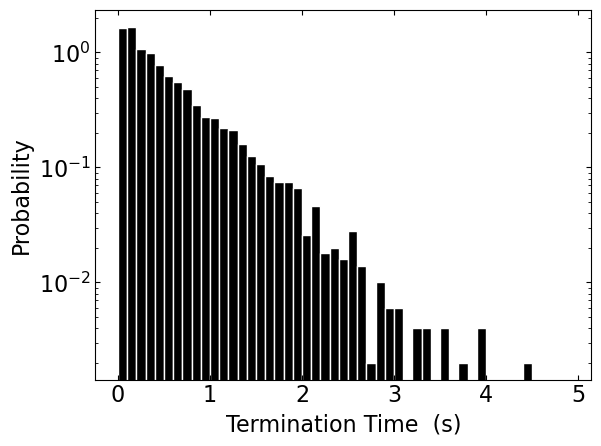

In [44]:
fontsize=16
fig,ax=plt.subplots()
bins=16
# bins=np.arange(0,5,0.2)
# bins=32
bins=np.arange(0,5,0.1)
ax.hist(t_lst,color='k',bins=bins,density=True,alpha=1,label='Data',edgecolor='w')#,**kwargs)
format_plot(xlabel='Termination Time  (s)',ylabel='Probability',ax=ax,fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_yscale('log')
plt.show()

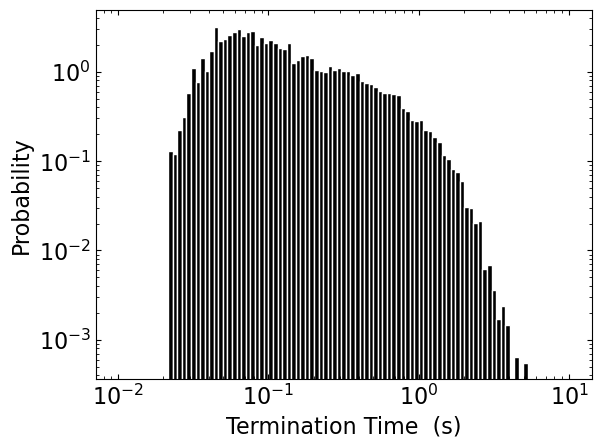

In [45]:
fontsize=16
fig,ax=plt.subplots()
bins=16
# bins=np.arange(0,5,0.2)
# bins=32
# bins=np.arange(0,3,0.05)
bins=np.logspace(-2,1,100)
ax.hist(t_lst,color='k',bins=bins,density=True,alpha=1,label='Data',edgecolor='w')#,**kwargs)
format_plot(xlabel='Termination Time  (s)',ylabel='Probability',ax=ax,fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [89]:
#heretim
#Q: does a large number of trials with creation OFF lead to inverse powerlaw termination time distributions?
#Q: if creation is OFF, do I get a straight line with slope -1 in the plot ibid?

In [47]:
# save_dir = f"{nb_dir}/data/creation_data/term_times_LR_no_creation.csv"
save_dir = f"{nb_dir}/data/creation_data/term_times_LR_chi_{chi}_delta_{creation_duration}_Rcbar_{R_c_bar}.csv"
os.path.exists(save_dir)
# save_dir

False

In [48]:
np.savetxt(save_dir,t_lst)

In [18]:
# for seed in range(100):
#     t = gener_termination_time(seed)
# termination time: 0.1626500000000219
# termination time: 0.19923000000005847

#Q: why was gener_termination_time giving different results!?
#A: bc njit's LLVM backend apparently uses a different randomization seed than numpy
# termination time: 0.19009000000004933
# termination time: 0.03577000000000028
# termination time: 0.07939000000000192
# termination time: 0.5687100000000466
# termination time: 0.021529999999999293
# termination time: 0.1721500000000314
# termination time: 0.09975999999999402

In [193]:
np.mean([0.19009000000004933,0.03577000000000028,0.07939000000000192,0.5687100000000466,0.021529999999999293,0.1721500000000314,0.09975999999999402])
0.1667714285714461


0.1667714285714461

In [185]:
# seed=42
# np.random.seed(seed)
# # x_values=np.random.uniform(0,1,size=N)*L
# # y_values=np.random.uniform(0,1,size=N)*L
# # _values=np.random.choice(list(range(100)))
# # _values=np.random.normal()
# # _values=uniformRandom()
# _values=normalRandom()
# # y_values=np.random.uniform(0,1,size=N)*L
# _values

In [89]:
# expected value: for LR model
#  τ0 = 13.1 ± 0.4 ms for N0 = 2
#  A0 = 13.3 ± 0.3 cm2 at both N0 = 2 and N0=20
#src: dissertation
expected_term_time_N0_2_LR = 13.1*np.exp(A/13.3) #ms
Delta_expected_term_time_N0_2_LR = (0.4/13.1)**2 + (A*0.3/13.3**2)**2
Delta_expected_term_time_N0_2_LR *= expected_term_time_N0_2_LR**2
print(f"{expected_term_time_N0_2_LR=:.2f} ± {Delta_expected_term_time_N0_2_LR:.2f} ms")

# τ0 = 2.44 ± 0.02 ms for the FK model
# A0 = 3.827 ± 0.007 cm2
expected_term_time_N0_2_FK = 2.44*np.exp(A/3.827) #ms
Delta_expected_term_time_N0_2_FK = (0.02/2.44)**2 + (A*0.007/3.827**2)**2
Delta_expected_term_time_N0_2_FK *= expected_term_time_N0_2_FK**2
print(f"{expected_term_time_N0_2_FK=:.2f} ± {Delta_expected_term_time_N0_2_FK:.2F} ms")
A

NameError: name 'A' is not defined

In [ ]:
#TODO: measure tau(2) directly from the full models